In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import signal
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
%matplotlib inline

In [2]:
from sklearn import linear_model

In [3]:
df = pd.read_pickle('data/MaunaLoa.picke')

In [4]:
n = df.index.size
t = np.arange(n).reshape((n,1))
df['WeekIndex'] = t

In [5]:
OLSModel = linear_model.LinearRegression()
OLSFit = OLSModel.fit(t, df.Interpolated)

In [6]:
df['LinearFit'] = OLSFit.predict(t)

In [7]:
RANSACModel = linear_model.RANSACRegressor()
RANSACFit = RANSACModel.fit(t, df.Interpolated)

In [8]:
df['LinearFit'] = RANSACFit.predict(t)

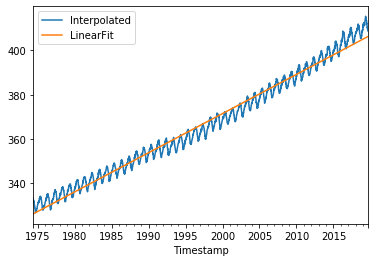

In [9]:
df[['Interpolated', 'LinearFit']].plot()

In [10]:
(RANSACFit.estimator_.coef_[0], RANSACFit.estimator_.intercept_)

(0.03384997585586864, 326.2426283147853)

In [11]:
df.sample(5)

,Original,Performance,Interpolated,WeekIndex,LinearFit
Timestamp,,,,,
2012-09-02,391.86,6,391.86,1998,393.874880
2002-01-20,372.58,7,372.58,1444,375.121993
2003-04-06,377.13,7,377.13,1507,377.254542
1989-11-05,351.32,7,351.32,807,353.559559
1990-01-07,353.53,6,353.53,816,353.864209


In [12]:
df['LinearDetrend'] = df['Interpolated'] - df['LinearFit']

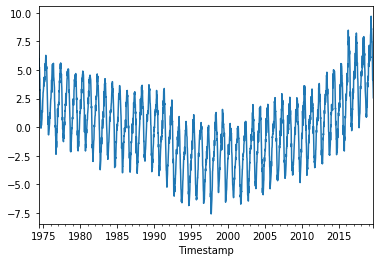

In [13]:
df['LinearDetrend'].plot()

In [14]:
df['LinearDetrend'].mean()

-9.906721053575678e-15

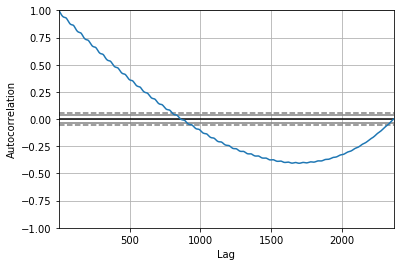

In [15]:
autocorrelation_plot(df.Interpolated)

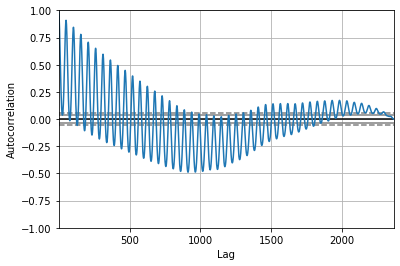

In [16]:
axe = autocorrelation_plot(df.LinearDetrend)
#axe.legend()

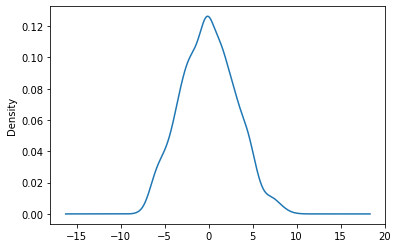

In [17]:
df.LinearDetrend.plot(kind='kde')

In [18]:
df.sample(5)

,Original,Performance,Interpolated,WeekIndex,LinearFit,LinearDetrend
Timestamp,,,,,,
2008-12-21,385.93,7,385.930,1805,387.341835,-1.411835
1975-12-14,NaN,0,330.364,82,329.018326,1.345674
1983-09-18,340.29,5,340.290,487,342.727567,-2.437567
1990-06-17,356.13,7,356.130,839,354.642758,1.487242
2004-04-04,380.00,5,380.000,1559,379.014741,0.985259


In [19]:
df['SGSeasonalTrend'] = signal.savgol_filter(df.Interpolated, 4*6+1, 2)
#df['SavGov1Y'] = signal.savgol_filter(df.Interpolated, 4*12+1, 2)
#df['SavGov5Y'] = signal.savgol_filter(df.Interpolated, 5*4*12+1, 2)
df['SGLongTermTrend'] = signal.savgol_filter(df.Interpolated, 10*4*12+1, 2)

/usr/lib/python3/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


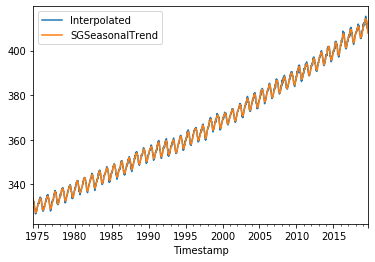

In [20]:
df[['Interpolated', 'SGSeasonalTrend']].plot()

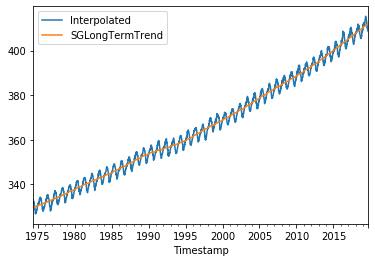

In [21]:
df[['Interpolated', 'SGLongTermTrend']].plot()

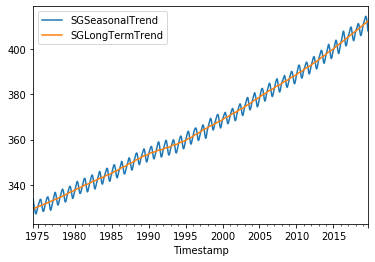

In [22]:
df[['SGSeasonalTrend', 'SGLongTermTrend']].plot()

In [23]:
df['SGSeasonalDetrend'] = df['Interpolated'] - df['SGSeasonalTrend']
df['SGLongTermDetrend'] = df['Interpolated'] - df['SGLongTermTrend']

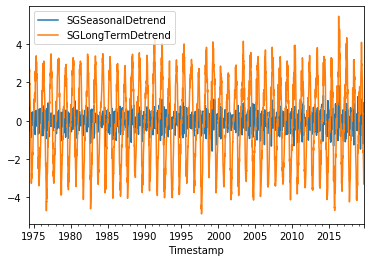

In [24]:
df[['SGSeasonalDetrend', 'SGLongTermDetrend']].plot()

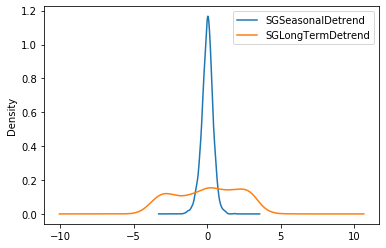

In [25]:
df[['SGSeasonalDetrend', 'SGLongTermDetrend']].plot(kind='kde')

In [26]:
df.to_pickle('./data/MaunaLoa_Detrend.pickle')

In [27]:
df.to_pickle('./data/JoinCO2.pickle')